Necessary libraries that must be installed: 

1. numpy

2. scipy

3. keras

4. tensorflow

5. matplot lib

6. the libraries provided by the github repo for kits 19 - these were given in a folder. 


In [33]:
#Loading in the necessary libraries
import numpy as np #imports the numpy library
from scipy import ndimage #imports the multidimensional image procesing library from scipy
from numpy.random import randint #imports randint functionality from numpy
import keras #imports keras
import random #imports random
import tensorflow as tf #imports tensorflow
#imports specific functions from keras that will be used in the model.
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout, Conv3D, MaxPooling3D, Conv3DTranspose, BatchNormalization, Reshape
#! python /content/kits19/starter_code/utils.py #imports the utility python notebook from the cloned repo
import sys #imports system
sys.path.append('/content/kits19/') #creates system path
import starter_code #imports the starter code folder
from starter_code.utils import load_case #imports load case from the utilities notebook in the cloned repo.
from starter_code.visualize import visualize #imports visualizes case functionality from the starter code file
import keras.backend as K #imports the backend of keras as K
from keras import backend as K 
from starter_code.evaluation import evaluate #imports evaluation code given by kits 19
import keras.utils #imports keras utilities
from keras.utils import to_categorical #imports to_categroical from keras utilities
import matplotlib #imports matplotlib
import matplotlib.pyplot as plt

# PreProcessing

Resizing of images to give them equivalent number of slices, and reducing width and height to improve computational efficiency. 

https://keras.io/examples/vision/3D_image_classification/

Preprocessing

In [154]:
#Sources consulted : https://keras.io/examples/vision/3D_image_classification/
def resize_volume(img):
 # Set the desired slices, desired width and desired height. Where depth refers to number of slices. 
    desired_depth = 64
    desired_width = 128
    desired_height = 128
    # Compute ratios between current and desired dimensions 
    current_depth = img.shape[0]
    current_width = img.shape[1]
    current_height = img.shape[-1]
    #invert the aforementioned ratios
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    #resizes the image
    img = ndimage.zoom(img, (depth_factor, width_factor, height_factor), order=1)
    #return resized image
    return img

Normalization of HU values

In [155]:
#PreProcessing - from https://keras.io/examples/vision/3D_image_classification/
#volume normalization
def normalize(VolumeIn):
  min = -1000
  max = 400
  VolumeIn[VolumeIn < min] = min #sets any value less than -1000Hu to -1000
  VolumeIn[VolumeIn > max] = max #sets any value greater than 400Hu to 400
  VolumeIn = (VolumeIn - min) / (max - min) #normalizes all pixel values
  Volume = VolumeIn.astype("float32") #assures that output is a numpy array of type float 32
  return Volume


Create function that both resizes and normalizes, to be used on the x data.

In [156]:
#Preprocessing pipeline
def PreProcess(volume):
  Vol1 = normalize(volume) #normalizes HU units
  Vol2 = resize_volume(Vol1) #resizes image
  return Vol2

# Training Data Selection

In [157]:
# Training Data Selection
train_x = []
train_y = []
train_case = []

for i in range(5): ##For the desired number of training samples
  #choose 5 random cases.
  a = randint(0,49) # Used format specification mini-language, chosen between 0 and 50 to prevent overlap with other test and validation
  stringName = 'case_00'+ str(a).zfill(3)
  train_case.append(stringName)
  #load the volume and segmentation of those cases
  #will terminate if there's no segmentation file present
  volume, segmentation = load_case(stringName)
  #load the image pixel array of the 'label'(labels)
  seg = segmentation.get_fdata()#gets the image array
  #load the image pixel array of the 'original' scan(features)
  vol = volume.get_fdata()
  #Preprocess the features (resize and normalize)
  volPre = PreProcess(vol) 
  #Preprocess the labels(normalize only)
  segPre = resize_volume(seg)

  #create training y and training x
  #training x (the features, or original images)
  #dimensiosn of all data added should be 64x512x512
  train_x.append(volPre)

  #training y (the labels, or segmented images)
  #dimensiosn of all data added should be 64x512x512
  train_y.append(segPre)
#ensure that outputs are in array form  
train_x = np.array(train_x)
train_y = np.array(train_y)
train_case = np.array(train_case)


Reshape data to have number of slices on third axis, since this is common practice. 

In [158]:
train_x = np.moveaxis(train_x, 1, 3)#moved the 1st dimension to the 3rd axis dimension 
print(train_x.shape) 

(5, 128, 128, 64)


In [159]:
train_y = np.moveaxis(train_y, 1, 3)#moved the 1st dimension to the 3rd axis dimension 


In [160]:
print(train_y.shape) 

(5, 128, 128, 64)


# Selection of Validation Data

In [161]:
#create empty lists to store validation data info.
valid_x = []
valid_y = []
valid_case = []
for i in range(3): ##For 3 samples
  #choose 3 random cases.
  a = randint(50,79) # Used format specification mini-language, range prevents overlap with training and testing datasets
  stringName = 'case_00'+ str(a).zfill(3)
  valid_case.append(stringName)
  #load the volume and segemntation of those cases
  #will terminate if there's no segmentation file present
  volume, segmentation = load_case(stringName)
  #load the image pixel array of the 'label'(labels)
  seg = segmentation.get_fdata()#gets the image array
  #load the image pixel array of the 'original' scan(features)
  vol = volume.get_fdata()
  #Preprocess the features (resize and normalize)
  volPre = PreProcess(vol) ####### You had volPre as an argument here, pretty sure you intended vol to be here
  #Preprocess the labels(normalize only)
  segPre = resize_volume(seg)

  #create training y and training x
  #training x (the features, or original images)
  #dimensiosn of all data added should be 64x512x512
  valid_x.append(volPre)

  #training y (the labels, or segmented images)
  #dimensiosn of all data added should be 64x512x512
  valid_y.append(segPre)
#ensure that outputs are in array form
valid_x = np.array(valid_x)
valid_y = np.array(valid_y)
valid_case = np.array(valid_case)

Reshape data to have number of slices on third axis, since this is common practice. 

In [162]:
valid_x = np.moveaxis(valid_x, 1, 3)#moved the 1st dimension to the 3rd axis dimension
print(valid_x.shape) 

(3, 128, 128, 64)


In [163]:
valid_y = np.moveaxis(valid_y, 1, 3)#moved the 1st dimension to the 3rd axis dimension
print(valid_y.shape) 

(3, 128, 128, 64)


Expand dimensions of y data, and one hot endcode, to allow comparison to UNet output

In [165]:
train_y = np.expand_dims(train_y, axis = -1)#expands dimension, to give 1 channel on the fifth dimensional axis, which is necesary for 3D convolution

In [166]:
print(np.max(train_y))
print(train_y.shape)

2.0000000000000004
(5, 128, 128, 64, 1)


In [167]:
#one hot encodes, using the to_categorical function, creating 3 binary layers, one corespodnig to each class, which was previously in the array as integers. 
train_y = to_categorical(train_y,3)

In [168]:
print(train_y.shape)

(5, 128, 128, 64, 3)


In [169]:
print(np.max(train_y))#printing max value to ensure it has converted to binary

1.0


In [170]:
valid_y = np.expand_dims(valid_y, axis = -1)valid_y = np.expand_dims(valid_y, axis = -1)#expands dimension, to give 1 channel on the fifth dimensional axis, which is necesary for 3D convolution
#print(valid_yA.shape)


In [171]:
valid_y = to_categorical(valid_y,3)#one hot encodes, using the to_categorical function, creating 3 binary layers, one corespodnig to each class, which was previously in the array as integers.

# Data Augumentation

In [172]:
# Preprocessing - Data augmentation, from from https://keras.io/examples/vision/3D_image_classification/

# The purpose of this step is to alter the angle of the orignial CT scan slice
# in order to artifically create more training data. This new data sample

def rotate(volume):
    """Rotate the volume by a few degrees"""

    def scipy_rotate(volume):
        # define some rotation angles
        angles = [-20, -10, -5, 5, 10, 20]
        # pick angles at random
        angle = random.choice(angles)
        # rotate volume
        volume = ndimage.rotate(volume, angle, reshape=False)
        volume[volume < 0] = 0
        volume[volume > 1] = 1
        return volume

    augmented_volume = tf.numpy_function(scipy_rotate, [volume], tf.float32)
    return augmented_volume

In [173]:
#Pre processes train data by rotating the data and expanding dimensiosn to create one channel in the fifth axis of the array which is necessary for convolution, from https://keras.io/examples/vision/3D_image_classification/
def train_preprocessing(volume, label):

    # Rotate volume
    volume = rotate(volume)
    volume = tf.expand_dims(volume, axis=-1)
    return volume, label

In [174]:
#Pre processes validation data by expanding dimensiosn to create one channel in the fifth axis of the array which is necessary for convolution - from https://keras.io/examples/vision/3D_image_classification/
def validation_preprocessing(volume, label):
    volume = tf.expand_dims(volume, axis=-1)
    return volume, label

Loaders that will preform data augumentation on training data throughout model fitting

In [175]:
#Define data loaders.- Pre processes validation data by expanding dimensions to create one channel in the fifth axis of the array which is necessary for convolution
train_loader = tf.data.Dataset.from_tensor_slices((train_x, train_y))
validation_loader = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

batch_size = 2
# Augment the on the fly during training.
train_dataset = (
    train_loader.shuffle(len(train_x))
    .map(train_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)

# Only rescale.
validation_dataset = (
    validation_loader.shuffle(len(valid_x))
    .map(validation_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)

# Testing Data Selection

In [405]:
#creates empty lists to store data. 
test_x = []
test_y = []
test_case = []
for i in range(5): ##For the number of desired cases (5)
  #choose 5 random cases.
  a = randint(80,99) # Used format specification mini-language, prevents overlap with training and validation
  stringName = 'case_00'+ str(a).zfill(3)
  test_case.append(stringName)
  #load the volume and segemntation of those cases
  #will terminate if there's no segmentation file present
  volume, segmentation = load_case(stringName)
  #load the image pixel array of the 'label'(labels)
  seg = segmentation.get_fdata()#gets the image array
  #load the image pixel array of the 'original' scan(features)
  vol = volume.get_fdata()
  #Preprocess the features (resize and normalize)
  volPre = PreProcess(vol) 
  #Preprocess the labels(normalize only)
  segPre = resize_volume(seg)

  #create training y and training x
  #training x (the features, or original images)
  #dimensiosn of all data added should be 64x512x512
  test_x.append(volPre)

  #training y (the labels, or segmented images)
  #dimensiosn of all data added should be 64x512x512
  test_y.append(segPre)
#ensures returned data is in numpy array form
test_x = np.array(test_x)
test_y = np.array(test_y)
test_case = np.array(test_case)

Rearrange axes to have depth (number of slices ) as the third dimension, as is common practice 

In [406]:
test_x = np.moveaxis(test_x, 1, 3) #moves the axis in the 1st postion to the 3rd postion to put dimensiosn into width, height, depth for UNet

In [407]:
print(test_x.shape)

(5, 128, 128, 64)


In [408]:
test_y = np.moveaxis(test_y, 1, 3)#moves the axis in the 1st postion to the 3rd postion to put dimensiosn into width, height, depth for UNet

Expand axes for inputting into code.

In [409]:
test_y = np.expand_dims(test_y, axis = -1) #expands to give 5th dimension, necessary for conv3D

In [411]:
test_x = np.expand_dims(test_x, axis = -1)#expands to give 5th dimension, necessary for conv3D

Convert test data to categorical as explained above

In [410]:
test_y = to_categorical(test_y,3) #converts to binary arrays with 3 channels

# Model Creation

Adam - Categorical Cross Entropy 
https://keras.io/api/optimizers/

Creates functions of Metrics for use, general dice coefficient (dice_coefficient), class-wise dice coefficient (dice_classwise), as well as the tversky loss function(tversky_loss)

In [176]:
##Sourced from: https://github.com/muellerdo/kits19.MIScnn/blob/master/MIScnn/models/metrics.py
def dice_coefficient(y_true, y_pred, smooth=0.00001):
    y_true_f = K.flatten(y_true) #flattens array
    y_pred_f = K.flatten(y_pred) #flattens array
    intersection = K.sum(y_true_f * y_pred_f) #finds areas where pixel vlaues matrch
    return (2. * intersection + smooth) / \
           (K.sum(y_true_f) + K.sum(y_pred_f) + smooth) #determines dice score

In [178]:
## Sourced from: https://github.com/muellerdo/kits19.MIScnn/blob/master/MIScnn/models/metrics.py
def dice_classwise(y_true, y_pred, smooth=0.00001):
    intersection = y_true * y_pred #finds intersection where pixel values match for said class (value = 1)
    intersection = K.sum(intersection, axis=[1,2,3]) #sums the itnersection for each class
    y_true = K.sum(y_true, axis=[1,2,3]) #sums the true values from the given segmentation
    y_pred = K.sum(y_pred, axis=[1,2,3])#sums the true values from the given prediction
    dice = ((2 * intersection) + smooth) / (y_true + y_pred + smooth) #determines classwise dice
    return dice


In [180]:
##sourced from https://github.com/muellerdo/kits19.MIScnn/blob/master/MIScnn/models/metrics.py
def tversky_loss(y_true, y_pred, smooth=0.000001):
    # Define alpha and beta
    alpha = 0.5
    beta  = 0.5
    # Calculate Tversky for each class
    tp = K.sum(y_true * y_pred, axis=[1,2,3]) #determines intersection and sums it for true positives
    fn = K.sum(y_true * (1-y_pred), axis=[1,2,3])#determines intersection and sums it for false negatives
    fp = K.sum((1-y_true) * y_pred, axis=[1,2,3]) #determines intersection and sums it for false positives
    tversky_class = (tp + smooth)/(tp + alpha*fn + beta*fp + smooth) #calculates Tversky class
    # Sum up classes to one score
    tversky = K.sum(tversky_class, axis=[-1])
    # Identify number of classes
    n = K.cast(K.shape(y_true)[-1], 'float32')
    # Return Tversky
    return n-tversky

In [191]:
#defines array of metrics. Sourced from:https://github.com/muellerdo/kits19.MIScnn/blob/master/MIScnn/models/metrics.py
metric = [dice_coefficient, dice_classwise, 'categorical_accuracy', 'categorical_crossentropy']

In [192]:
#creates keras model
# Sources consulted:
# https://keras.io/examples/vision/3D_image_classification/
# https://keras.io/api/layers/normalization_layers/batch_normalization/
# https://keras.io/api/layers/pooling_layers/max_pooling3d/
# https://keras.io/api/layers/regularization_layers/dropout/
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv3DTranspose
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv3D
def UNetModel(width, height, depth):
#Define Input shape
  inputs = keras.Input((width, height, depth, 1))
#Descending Steps: 
  #performs 2 3D convolutions and batch normalizes the result (relu activation)
  #performs maxpooling3d, reducing size of input dimensions by half
  #performs random dropout using a randomly generated value between 0 and 1
#Connect Step
  #performs 2 3D convolutions and batch normalizes the result (relu activation)
  #performs a single 3D transposed convolution
#Ascending Steps
  #concatenates the value generated on the opposite side of the architecture
  # with the current value
  #performs random dropout using a randomly generated value between 0 and 1
  #performs 2 3D convolutions and batch normalizes the result (relu activation)
#Output Step
  #Performs a final 3D convolution with a softmax activation, and a channel size of 3 since there are 3 outputs. 
#Descending Step 1 
  Convolution1 = BatchNormalization()(Conv3D(filters = 32, kernel_size = 3, padding = "same", activation = "relu")(Conv3D(filters = 32, kernel_size = 3, padding = "same", activation = "relu")(inputs)))
  #preforms random dropout usign a random value between 0 and 1
  DropVal1 = random.uniform(0,1)
  OutputStep1 = Dropout(DropVal1)(MaxPooling3D(pool_size = 2, strides = 2)(Convolution1))
#Descending Step 2
  Convolution2 = BatchNormalization()(Conv3D(filters = 64, kernel_size = 3, padding = "same", activation = "relu")(Conv3D(filters = 64, kernel_size = 3, padding = "same", activation = "relu")(OutputStep1)))
  DropVal2 = random.uniform(0,1)
  OutputStep2 = Dropout(DropVal2)(MaxPooling3D(pool_size = 2, strides = 2)(Convolution2))
#Descending Step 3
  Convolution3 = BatchNormalization()(Conv3D(filters = 128, kernel_size = 3, padding = "same", activation = "relu")(Conv3D(filters = 128, kernel_size = 3, padding = "same", activation = "relu")(OutputStep2)))
  DropVal3 = random.uniform(0,1)
  OutputStep3 = Dropout(DropVal3)(MaxPooling3D(pool_size = 2, strides = 2)(Convolution3))


#Connecting step
  ConvolutionMid = BatchNormalization()(Conv3D(filters=256, kernel_size=3, padding = "same", activation="relu")(Conv3D(filters=512, kernel_size=3, padding = "same", activation="relu")(OutputStep3)))
  DeConvMid = Conv3DTranspose(filters = 256, kernel_size = 3, strides = 2, padding = "same", activation = "relu")(ConvolutionMid)

#Ascending Step 1
  DropVal5 = random.uniform(0,1)
  ConDrop1 = Dropout(DropVal5)(concatenate([Convolution3, DeConvMid])) 
  ConvUp1 = BatchNormalization()(Conv3D(filters = 128, kernel_size = 3, padding = "same", activation = "relu")(Conv3D(filters = 128, kernel_size = 3, padding = "same", activation = "relu")(ConDrop1)))
#Ascending Step 2
  DeConv1 = Conv3DTranspose(filters = 128, kernel_size = 3, strides = 2, padding = "same", activation = "relu")(ConvUp1)
  DropVal6 = random.uniform(0,1)
  ConDrop2 = Dropout(DropVal6)(concatenate([Convolution2, DeConv1]))
  ConvUp2 = BatchNormalization()(Conv3D(filters = 64, kernel_size = 3, padding = "same", activation = "relu")(Conv3D(filters = 64, kernel_size = 3, padding = "same", activation = "relu")(ConDrop2)))
#Ascending Step 3
  DeConv2 = Conv3DTranspose(filters = 64, kernel_size = 3, strides = 2, padding = "same", activation = "relu")(ConvUp2)
  DropVal7 = random.uniform(0,1)
  ConDrop3 = Dropout(DropVal7)(concatenate([Convolution1, DeConv2]))
  ConvUp3 = BatchNormalization()(Conv3D(filters = 32, kernel_size = 3, padding = "same", activation = "relu")(Conv3D(filters = 32, kernel_size = 3, padding = "same", activation = "relu")(ConDrop3)))


#Output Step
  lastConvolution = Conv3D(filters = 3, kernel_size = 1, activation = "softmax")(ConvUp3)
  
  modelCat = keras.Model(inputs = [inputs], outputs = [lastConvolution])
  modelCat.compile(optimizer = keras.optimizers.Adam(lr=0.001), loss = tversky_loss, metrics = metric)
  return modelCat

In [193]:
#declares model and summaries it.
modelCat = UNetModel(width=128, height=128,depth=64)
modelCat.summary()
modelCat.summary(line_length=150)

28, 64, 128         conv3d_60[0][0]                  
__________________________________________________________________________________________________
max_pooling3d_12 (MaxPooling3D) (None, 64, 64, 32, 3 0           batch_normalization_28[0][0]     
__________________________________________________________________________________________________
dropout_24 (Dropout)            (None, 64, 64, 32, 3 0           max_pooling3d_12[0][0]           
__________________________________________________________________________________________________
conv3d_63 (Conv3D)              (None, 64, 64, 32, 6 55360       dropout_24[0][0]                 
__________________________________________________________________________________________________
conv3d_62 (Conv3D)              (None, 64, 64, 32, 6 110656      conv3d_63[0][0]                  
__________________________________________________________________________________________________
batch_normalization_29 (BatchNo (None, 64, 64, 32, 6 25

In [194]:
#fits model usign given trianing ad validation data, as well as epohcs, loss and metrics. Verbose shows progress bars for each epoch. 
modelCat.fit(train_dataset, validation_data=validation_dataset, epochs=50, shuffle=True, verbose=1)

Epoch 1/10
3/3 [==============================] - 116s 39s/step - loss: 2.4294 - dice_coefficient: 0.4036 - dice_classwise: 0.1902 - categorical_accuracy: 0.4262 - categorical_crossentropy: 1.9334 - val_loss: 2.7732 - val_dice_coefficient: 0.1212 - val_dice_classwise: 0.0756 - val_categorical_accuracy: 0.2117 - val_categorical_crossentropy: 5.7571
Epoch 2/10
3/3 [==============================] - 116s 39s/step - loss: 2.2587 - dice_coefficient: 0.5590 - dice_classwise: 0.2471 - categorical_accuracy: 0.5914 - categorical_crossentropy: 3.1001 - val_loss: 2.8775 - val_dice_coefficient: 0.0729 - val_dice_classwise: 0.0408 - val_categorical_accuracy: 0.1262 - val_categorical_crossentropy: 13.3203
Epoch 3/10
3/3 [==============================] - 119s 40s/step - loss: 2.2072 - dice_coefficient: 0.6199 - dice_classwise: 0.2643 - categorical_accuracy: 0.6545 - categorical_crossentropy: 3.0136 - val_loss: 2.4268 - val_dice_coefficient: 0.3988 - val_dice_classwise: 0.1912 - val_categorical_accur

Create plots of metrics. 

These were manually typed in because kernel disconnected. 

In [294]:
##saves model incase kernel needs to be restarted. 
#sourced from: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

model_json = modelCat.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelCat.save_weights("modelCat.h5")
print("Saved model to disk")
 

Saved model to disk


In [19]:
epoch = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
dice_coef_History_Train= np.array([0.4036, 0.5590, 0.6199, 0.6736, 0.7053, 0.7231, 0.7352, 0.7506, 0.7616, 0.7709])

In [3]:
dice_classwise_History_Train = np.array([0.1902,0.2471,0.2643,0.2803,0.2910,0.2961,0.2999,0.3045,0.3081,0.3112])

In [4]:
centropy_History_Train = np.array([1.9334,3.1001,3.0136,2.6609,2.3636,2.4742,2.2626,2.1519,2.1209,2.0724])

In [5]:
dice_coef_History_Valid = np.array([0.1212,0.0729,0.3988,0.2298,0.1697,0.1936,0.1759,0.2812,0.4436,0.8817])

In [6]:
dice_classwise_History_Valid = np.array([0.0756,0.0408,0.1912,0.1288,0.1032,0.1015,0.1056,0.1421,0.2119,0.3146])

In [7]:
centropy_History_Valid = np.array([5.7571,13.3203,6.6188,10.9273,11.9333,10.4922,8.9524,7.1139,2.7571,1.0904])

In [8]:
#sets save directory for image
images_dir = (r'C:\Users\Megan\Documents\Python Scripts\6500FinalProject\New folder\kits19')

Plot general dice

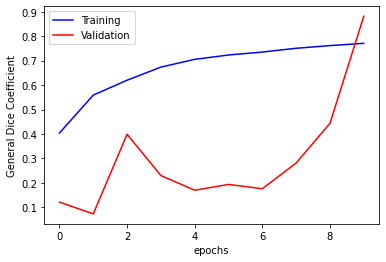

In [30]:
# from: https://stackoverflow.com/questions/4270301/matplotlib-multiple-datasets-on-the-same-scatter-plot

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(epoch, dice_coef_History_Train, c='b', label='Training')
ax1.plot(epoch,dice_coef_History_Valid,  c='r', label='Validation')
ax1.set_xlabel("epochs")
ax1.set_ylabel("General Dice Coefficient")
plt.legend(loc='upper left');
plt.show()


Plot class-wise Dice

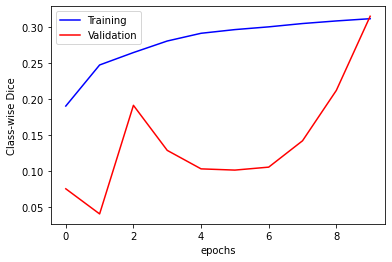

<Figure size 432x288 with 0 Axes>

In [29]:
# from: https://stackoverflow.com/questions/4270301/matplotlib-multiple-datasets-on-the-same-scatter-plot

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(epoch, dice_classwise_History_Train, c='b', label='Training')
ax1.plot(epoch,dice_classwise_History_Valid,  c='r', label='Validation')
ax1.set_xlabel("epochs")
ax1.set_ylabel("Class-wise Dice")
plt.legend(loc='upper left');
plt.show()


Plot categorical cross entropy

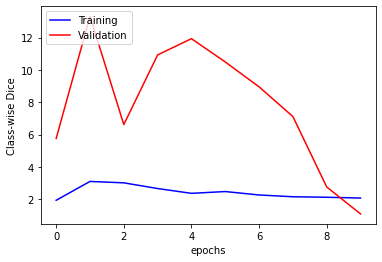

In [31]:
# from: https://stackoverflow.com/questions/4270301/matplotlib-multiple-datasets-on-the-same-scatter-plot

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(epoch, centropy_History_Train, c='b', label='Training')
ax1.plot(epoch,centropy_History_Valid,  c='r', label='Validation')
ax1.set_xlabel("epochs")
ax1.set_ylabel("Class-wise Dice")
plt.legend(loc='upper left');
plt.show()


Plot categorical accuracy adn Tversky loss

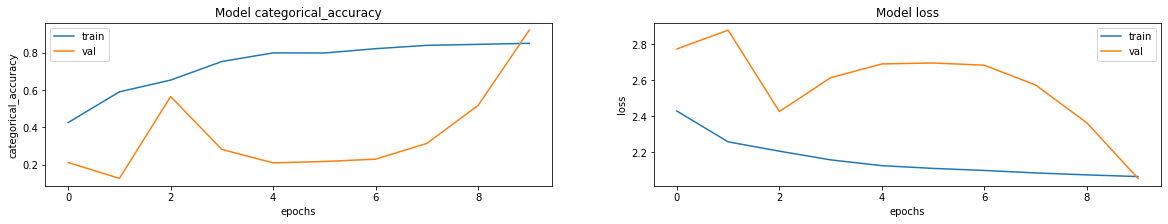

In [202]:
##Plots the metrics from the model vs epoch. 
#Sources consulted: 
# https://keras.io/examples/vision/3D_image_classification/
# https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
# https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["categorical_accuracy", "loss"]):
    ax[i].plot(modelCat.history.history[metric])
    ax[i].plot(modelCat.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])


Creates version of train_x, valid_x and test_x data that is correct dimensions to be input into the model. 

In [195]:
train_xE = np.expand_dims(train_x, axis = -1)#expands dimensions to correct size for output, by adding one channel in the fifth axis dimension.
valid_xE = np.expand_dims(valid_x, axis = -1)

In [206]:
#gets output of model for training data inputs. 
ACatAdamTrain = modelCat(train_xE)

(10, 128, 128, 64, 3)


In [207]:
print(ACatAdamTrain.shape)

(5, 128, 128, 64, 3)


In [211]:
##Determine predictions based on probabilitites, since Unet outputs probability matrix of each channel using the softmax function
pred = []
for i in range(5):
    pred_seg = np.argmax(ACatAdamTrain[i], axis=-1)
    pred.append(pred_seg)
predictions = np.array(pred)

In [214]:
predictions.shape

(5, 128, 128, 64)

# Validation Predicitons

Determines output segmentation on a channel wise basis from model

In [97]:
outAdamValid = modelCat(valid_xE)
print(outAdamValid.shape)

(3, 128, 128, 64, 3)


Determines segmentation classes based on probability

In [105]:
predV = []
for i in range(3):
    pred_segV = np.argmax(outAdamValid[i], axis=-1)
    predV.append(pred_segV)
predictionsV = np.array(predV)
print(predictionsV.shape)

# Test Predictions

Determines output segmentation on a channel wise basis from model

In [412]:
CatAdamTest = modelCat(test_x)

Determines segmentation classes based on probability

In [413]:
predTest = []
for i in range(5):
    pred_segTest = np.argmax(CatAdamTest[i], axis=-1)
    predTest.append(pred_segTest)
predictionsTest = np.array(predTest)

# Visualization 

In [395]:
# overlays predicted segmentation onto original image. 
# Sourced from: https://github.com/muellerdo/kits19.MIScnn/blob/master/MIScnn/utils/visualizer.py

def overlay_segmentation(vol,seg):
    # Scale volume to greyscale range
    vol_greyscale = (255*(vol - np.min(vol))/np.ptp(vol)).astype(int)
    # Convert volume to RGB
    vol_rgb = np.stack([vol_greyscale, vol_greyscale, vol_greyscale], axis=-1)
    # Initialize segmentation in RGB
    shp = seg.shape
    seg_rgb = np.zeros((shp[0], shp[1], shp[2], 3), dtype=np.int)
    # Set class to appropriate color
    seg_rgb[np.equal(seg, 1)] = [255, 0,   0]
    seg_rgb[np.equal(seg, 2)] = [0,   0, 255]
    # Get binary array for places where an ROI lives
    segbin = np.greater(seg, 0)
    repeated_segbin = np.stack((segbin, segbin, segbin), axis=-1)
    # Weighted sum where there's a value to overlay
    alpha = 0.3
    vol_overlayed = np.where(
        repeated_segbin,
        np.round(alpha*seg_rgb+(1-alpha)*vol_rgb).astype(np.uint8),
        np.round(vol_rgb).astype(np.uint8)
    )
    return vol_overlayed

In [424]:
#used to run the function above to get the output
Overlay = overlay_segmentation(test_x[4,:,:,:,0], predictionsTest[4])

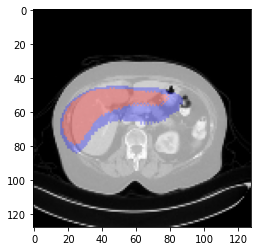

In [425]:
#sets save directory for image
images_dir = (r'C:\Users\Megan\Documents\Python Scripts\6500FinalProject\New folder\kits19')


plt.imshow(Overlay[:,:,15])#plots the image, at the 15th slice.
plt.savefig(f"{images_dir}/Test5Overlay.png", dpi=1200, bbox_inches="tight")## saves the figure to the afforementioned directory

Reshaping data for non-overlayed plotting

In [429]:
#reshapes the predicitons to have 1 channel
predictionsReshape = np.expand_dims(predictions, axis = -1)
print(predictionsReshape.shape)
#makes the data cateogrical, turning the matrix from 1 channel containing integers 0, 1 and 2 to 3 binary channels, corresponding to each integer class. 
RGBPred = to_categorical(predictionsReshape,3)

In [441]:
#reshapes the predicitons to have 1 channel
predictionsReshapeV = np.expand_dims(predictionsV, axis = -1)
#makes the data cateogrical, turning the matrix from 1 channel containing integers 0, 1 and 2 to 3 binary channels, corresponding to each integer class. 
RGBPredV = to_categorical(predictionsReshapeV,3)
print(RGBPredV.shape)

(3, 128, 128, 64, 3)


In [445]:
#reshapes the predicitons to have 1 channel
predictionsReshapeT = np.expand_dims(predictionsTest, axis = -1)
#makes the data cateogrical, turning the matrix from 1 channel containing integers 0, 1 and 2 to 3 binary channels, corresponding to each integer class. 
RGBPredT = to_categorical(predictionsReshapeT,3)
print(RGBPredT.shape)

(5, 128, 128, 64, 3)


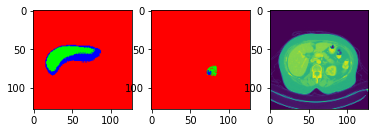

In [483]:
#plots the RGB images and segmentations side by side for visual comparison
#sources consulted:  https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html
image = RGBPredT[4]
orig = test_x[4]
labels = test_y
label = labels[4]
plt.subplot(1,3,1)
plt.imshow(np.squeeze(image[:,:, 15]))
plt.subplot(1,3,2)
plt.imshow(np.squeeze(label[:,:,15]))
plt.subplot(1,3,3)
plt.imshow(np.squeeze(orig[:,:,15]))
plt.savefig(f"{images_dir}/Test5.png", dpi=1200, bbox_inches="tight")#saves the figure to the directory declared above. 

# Determination of Dice Scores given by Kits19 Challenge code. 

In [488]:
def evaluate_me(gt, predictions): # sourced from evaluation code given in the kits 19 challenge: https://github.com/neheller/kits19
                                   # and modified to take the resized ground truths and predictions as inputs. 
    # Handle case of softmax output
    if len(predictions.shape) == 4:
        predictions = np.argmax(predictions, axis=-1)
    if len(gt.shape) == 4:
        gt = np.argmax(gt, axis=-1)
    #
    
    # Make sure shape agrees with case
    #if not predictions.shape == gt.shape:
    #    raise ValueError(
     #       ("Predictions for case {} have shape {} "
     #       "which do not match ground truth shape of {}").format(
     #           predictions.shape, gt.shape
     #       )
     #   )

    # Compute tumor+kidney Dice
    tk_pd = np.greater(predictions, 0)
    tk_gt = np.greater(gt, 0)
    tk_dice = 2*np.logical_and(tk_pd, tk_gt).sum()/(
            tk_pd.sum() + tk_gt.sum()
        )
   

    try:
        # Compute tumor Dice
        tu_pd = np.greater(predictions, 1)
        tu_gt = np.greater(gt, 1)
        tu_dice = 2*np.logical_and(tu_pd, tu_gt).sum()/(
            tu_pd.sum() + tu_gt.sum()
        )
    except ZeroDivisionError:
        return tk_dice, 0.0

    return tk_dice, tu_dice


Training Data Prediciton Dice Scores

In [494]:
#determines dice score of training data predictions
for i in range(5):
  KidneyTumorDiceTrain, TumorDiceTrain = evaluate_me(predictions[i,], train_y[i,])
  print(KidneyTumorDiceTrain, TumorDiceTrain)

0.0 0.0
0.0 0.0
2.1900527802720045e-05 0.0


In [ ]:
#determines dice score of training data predictions
for i in range(5):
  KidneyTumorDiceTrain, TumorDiceTrain = evaluate_me(predictions[i,], train_y[i,])
  print(KidneyTumorDiceTrain, TumorDiceTrain)

In [ ]:
#determines dice score of validation data predictions
for i in range(3):
  KidneyTumorDiceValid, TumorDiceValid = evaluate_me(predictionsV[i,], valid_y[i,])
  print(KidneyTumorDiceValid, TumorDiceTrain)

In [ ]:
#determines dice score of testing data predictions
for i in range(5):
  KidneyTumorDiceTest, TumorDiceTest = evaluate_me(predictionsTest[i,], test_y[i,])
  print(KidneyTumorDiceTest, TumorDiceTest)